### Airline Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
passenger=pd.read_csv('https://raw.githubusercontent.com/anejad/QuantJam_Notebooks/main/data/AirPassengers.csv')
passenger

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0, 0.5, 'Num of Passengers')

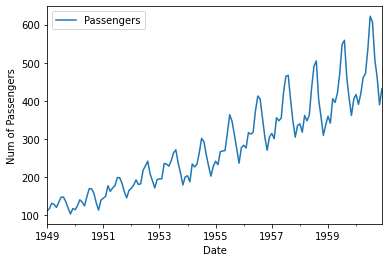

In [ ]:
passenger.columns=['Date','Passengers']
passenger.Date=pd.to_datetime(passenger.Date)
passenger.set_index('Date',inplace=True)
passenger.plot()
plt.xlabel('Date')
plt.ylabel('Num of Passengers')

In [ ]:
passenger.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab

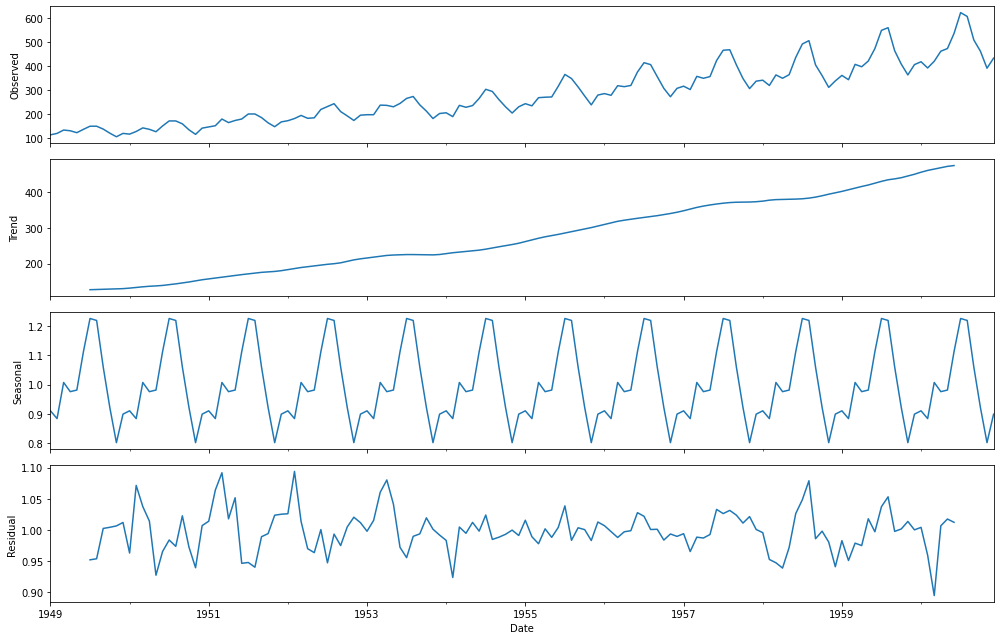

In [ ]:
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(passenger['Passengers'],model='multiplicatif')
ax=res.plot()
plt.show()

**Stasionarity**

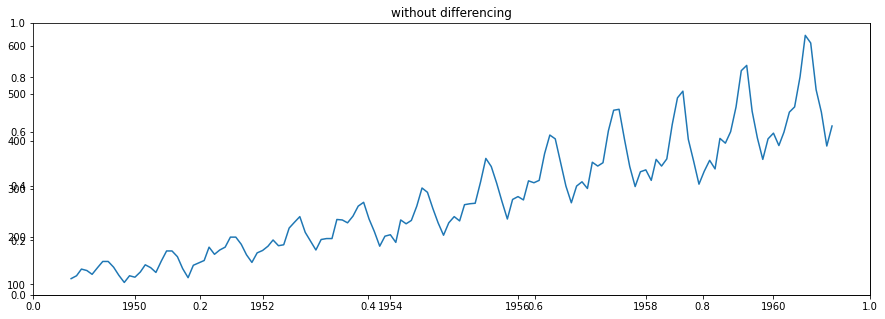

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax1= fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(passenger['Passengers'])

In [ ]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(passenger['Passengers'])

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Non-stationary


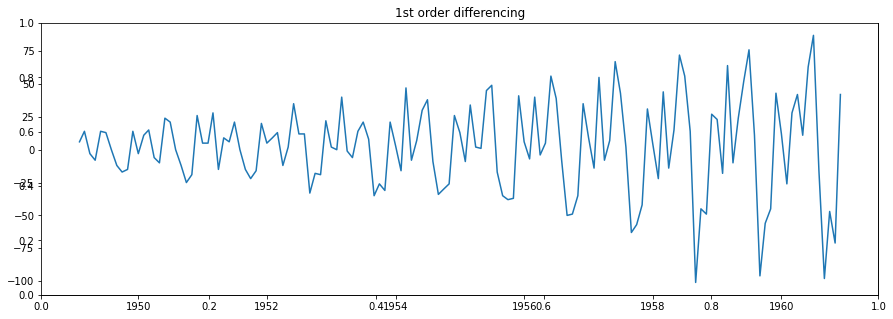

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax1= fig.add_subplot(111)
ax1.set_title('1st order differencing')
ax1.plot(passenger['Passengers'].diff())

In [ ]:
print("1st order differencing")
check_stationarity(passenger['Passengers'].diff().dropna())

1st order differencing
ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Non-stationary


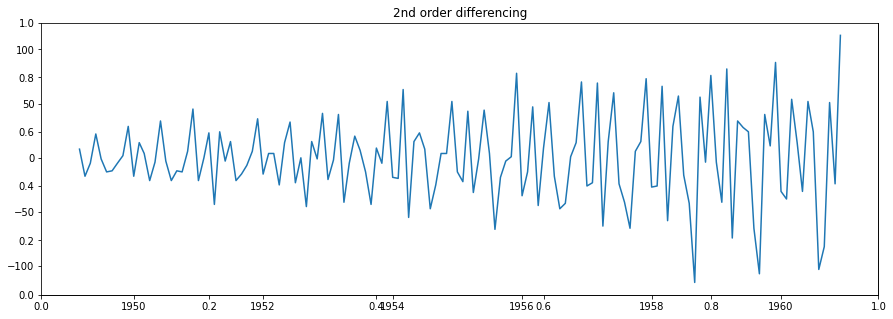

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax1= fig.add_subplot(111)
ax1.set_title('2nd order differencing')
ax1.plot(passenger['Passengers'].diff().diff())

In [ ]:
print("2nd order differencing")
check_stationarity(passenger['Passengers'].diff().diff().dropna())

2nd order differencing
ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Stationary


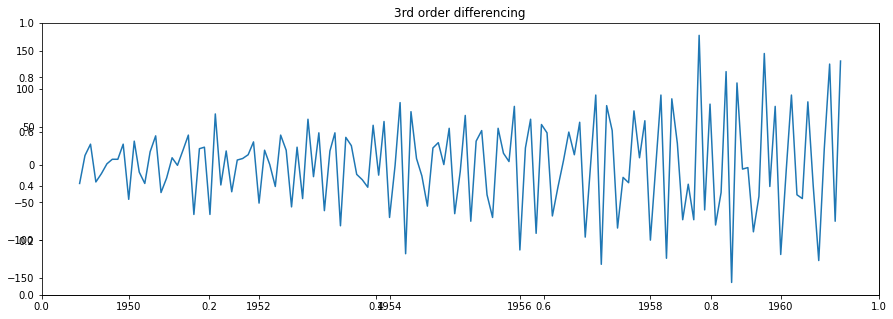

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax1= fig.add_subplot(111)
ax1.set_title('3rd order differencing')
ax1.plot(passenger['Passengers'].diff().diff().diff())



```
AR: acf tail off & pacf cut off -> nilai AR(p)=cut off ke berapa
```

```
MA: acf cut off & pacf tail off -> nilai MA(q)=cut off ke berapa
```

```
ARMA: acf & pacf cut off, nilai cut off dipakai utk jd p atai q
```

In [ ]:
ARMA(data,order(2,0))

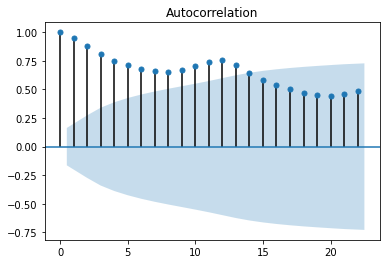

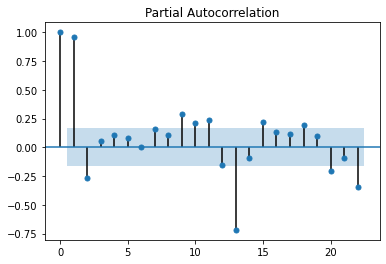

In [ ]:
plot_acf(passenger['Passengers'])
plot_pacf(passenger['Passengers'])
plt.show()

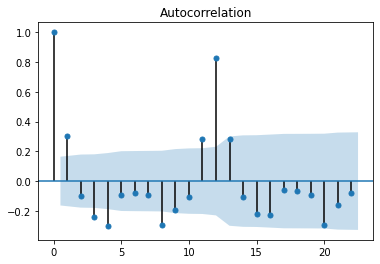

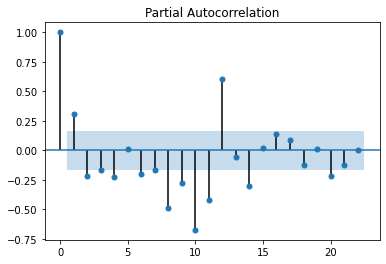

In [ ]:
plot_acf(passenger['Passengers'].diff().dropna())
plot_pacf(passenger['Passengers'].diff().dropna())
plt.show()

In [ ]:
ARMA(4,2)

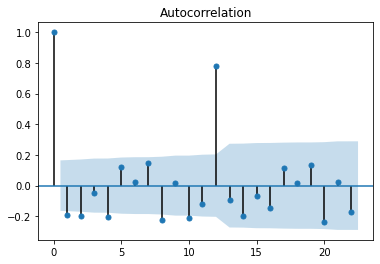

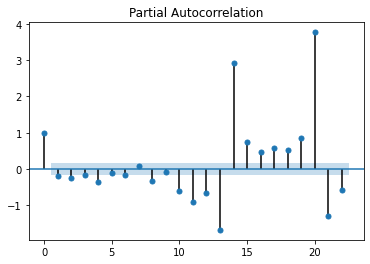

In [ ]:
plot_acf(passenger['Passengers'].diff().diff().dropna())
plot_pacf(passenger['Passengers'].diff().diff().dropna())
plt.show()

In [ ]:
def find_best_model(data,num_p,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pq=[[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for q in range(num_q+1):
            #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                try: #Using exception to avoid the error while training the model with certain p and q value
                    model=ARMA(data,order=(p,q))
                    result=model.fit()
                    pq[0].append(p)
                    pq[1].append(q)
                    aic.append(result.aic)
                except:
                    pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pq[0]
    df['q']=pq[1]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

In [ ]:
find_best_model(passenger['Passengers'],5,5)

(3, 4, 1371.4737376577716,     p  q          AIC
 18  3  4  1371.473738
 19  3  5  1373.462738
 17  3  3  1374.235650
 31  5  5  1378.184898
 23  4  3  1379.067555
 16  3  2  1379.372083
 24  4  4  1379.464952
 28  5  2  1390.586787
 22  4  2  1391.501746
 27  5  1  1396.629556
 29  5  3  1403.954529
 15  3  1  1404.016890
 26  5  0  1404.241427
 30  5  4  1404.810520
 10  2  1  1408.249223
 2   0  5  1408.760674
 4   1  1  1409.748270
 20  4  0  1409.757692
 14  3  0  1410.342306
 5   1  2  1411.050254
 9   2  0  1413.638784
 6   1  3  1419.538162
 3   1  0  1428.179379
 12  2  3  1446.104891
 11  2  2  1465.752851
 21  4  1  1617.704290
 1   0  1  1618.862527
 25  4  5  1680.869159
 0   0  0  1790.367580
 8   1  5  2228.841829
 13  2  4  2474.817877
 7   1  4  2477.204787)

In [ ]:
mod_ar = ARIMA(passenger, order=(4,2,2)) 

In [ ]:
res1=mod_ar.fit()

In [ ]:
res1.aic

1383.2574009497062

In [ ]:
find_best_model(passenger,5,5)

(4, 3, 1371.341892543671,     p  q          AIC
 22  4  3  1371.341893
 18  3  5  1373.462738
 17  3  3  1377.324345
 13  2  5  1378.332793
 16  3  2  1379.089949
 23  4  4  1379.526880
 26  5  2  1390.586787
 21  4  2  1392.074742
 25  5  1  1396.629556
 15  3  1  1403.652587
 27  5  3  1404.113152
 24  5  0  1404.241427
 28  5  4  1404.810520
 9   2  1  1408.249223
 3   1  1  1409.748270
 19  4  0  1409.757692
 14  3  0  1410.342306
 4   1  2  1411.050255
 5   1  3  1411.737276
 8   2  0  1413.638784
 2   1  0  1428.179379
 10  2  2  1455.580258
 20  4  1  1510.077268
 1   0  1  1618.862527
 11  2  3  1654.360255
 0   0  0  1790.367580
 7   1  5  2131.627236
 6   1  4  2417.877668
 12  2  4  2519.176343)

In [ ]:
def find_best_model(data,num_p,num_d,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pdq=[[],[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for d in range(num_d+1):
          for q in range(num_q+1):
            #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                try: #Using exception to avoid the error while training the model with certain p and q value
                    model=ARIMA(data,order=(p,d,q))
                    result=model.fit()
                    pdq[0].append(p)
                    pdq[1].append(d)
                    pdq[2].append(q)
                    aic.append(result.aic)
                except:
                    pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pdq[0]
    df['d']=pdq[1]
    df['q']=pdq[2]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.d.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

In [ ]:
find_best_model(passenger,5,3,5)

(4, 1, 5, 1332.5318997877837,     p  d  q          AIC
 70  4  1  5  1332.531900
 69  4  1  4  1332.955001
 86  5  1  5  1335.347024
 54  3  1  3  1336.775628
 39  2  1  4  1338.584833
 .. .. .. ..          ...
 32  2  0  3  1654.360255
 0   0  0  0  1790.367580
 17  1  0  5  2131.627236
 16  1  0  4  2417.877668
 33  2  0  4  2519.176343
 
 [93 rows x 4 columns])

In [ ]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 5.3 MB/s 
     |████████████████████████████████| 114 kB 53.1 MB/s 
     |████████████████████████████████| 251 kB 40.1 MB/s 


In [ ]:
mod_ar = ARMA(passenger, order=(1,0)) 
res1=mod_ar.fit()
mod_ma = ARMA(passenger, order=(0,1)) 
res2=mod_ma.fit()
mod_arma = ARMA(passenger, order=(1,1)) 
res3=mod_arma.fit()

In [ ]:
mod_arima=ARMA(passenger, order=(3,0)) 
res4=mod_arima.fit()
print('The AIC is',res4.aic)

The AIC is 1410.3423061201543


In [ ]:
mod_arima=ARIMA(passenger, order=(5,1,2)) 
res5=mod_arima.fit()
print('The AIC is',res5.aic)

The AIC is 1358.074279320985


In [ ]:
mod_arima=ARIMA(passenger['Passengers'], order=(1,1,1)) 
res6=mod_arima.fit()
print('The AIC is',res6.aic)

The AIC is 1402.1453998021439


In [ ]:
mod_arima=ARIMA(passenger['Passengers'], order=(2,2,2)) 
res7=mod_arima.fit()
print('The AIC is',res7.aic)

The AIC is 1394.65620750554


In [ ]:
mod_arima=ARIMA(passenger['Passengers'].diff().dropna(), order=(1,2,1)) 
res8=mod_arima.fit()
print('The AIC is',res8.aic)

The AIC is 1447.1615861806592


In [ ]:
print('The AIC of AR model is',res1.aic)
print('The AIC of MA model is',res2.aic)
print('The AIC of ARMA model is',res3.aic)
print('The AIC of ARIMA=ARMA model is',res4.aic)
print('The AIC of ARIMA_diff1 model is',res5.aic)
print('The AIC of ARIMA_diff1 model is',res6.aic)
print('The AIC of ARIMA_diff2 model is',res7.aic)
print('The AIC of ARIMA_diff3 model is',res8.aic)

The AIC of AR model is 1428.1793789966525
The AIC of MA model is 1618.862526986223
The AIC of ARMA model is 1409.7482703222324
The AIC of ARIMA=ARMA model is 1410.3423061201543
The AIC of ARIMA_diff1 model is 1358.074279320985
The AIC of ARIMA_diff1 model is 1402.1453998021439
The AIC of ARIMA_diff2 model is 1394.65620750554
The AIC of ARIMA_diff3 model is 1447.1615861806592


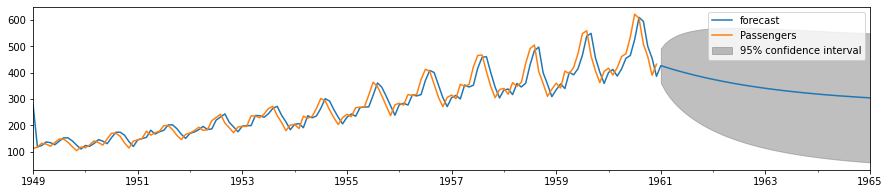

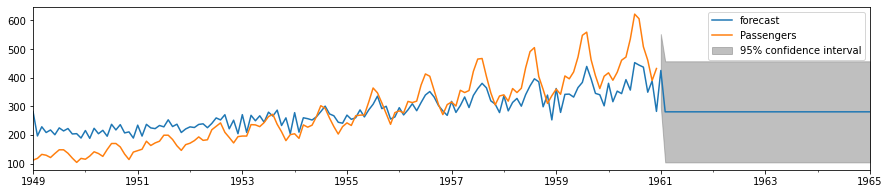

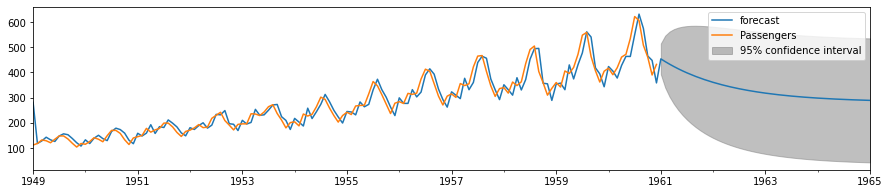

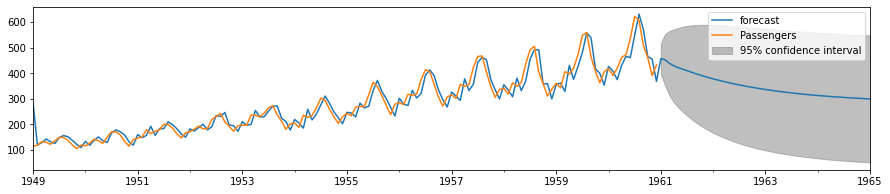

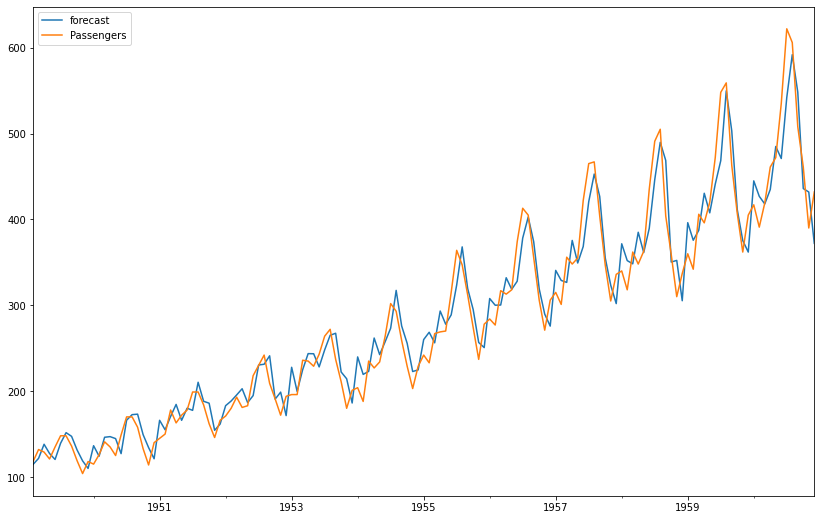

In [ ]:
fig,ax=plt.subplots(figsize=(15,3))
res1.plot_predict(start=0, end=len(passenger)+48,ax=ax)
plt.show()
fig,ax=plt.subplots(figsize=(15,3))
res2.plot_predict(start=0, end=len(passenger)+48,ax=ax)
plt.show()
fig,ax=plt.subplots(figsize=(15,3))
res3.plot_predict(start=0, end=len(passenger)+48,ax=ax)
plt.show()
fig,ax=plt.subplots(figsize=(15,3))
res4.plot_predict(start=0, end=len(passenger)+48,ax=ax)
plt.show()
res5.plot_predict(dynamic=False)
plt.show()

In [ ]:
st=passenger.shape[0]
nd=st+48

In [ ]:
new_pred=res4.predict(st,nd)
new_pred=pd.DataFrame(new_pred)
new_pred.columns=['Passengers']

In [ ]:
pass_pred=pd.concat([passenger,new_pred], axis=0)

In [ ]:
new_pred.head()

,Passengers
1961-01-01,456.726539
1961-02-01,451.524645
1961-03-01,438.221937
1961-04-01,428.146490
1961-05-01,421.307280


In [ ]:
pass_pred

,Passengers
1949-01-01,112.000000
1949-02-01,118.000000
1949-03-01,132.000000
1949-04-01,129.000000
1949-05-01,121.000000
...,...
1964-09-01,302.498029
1964-10-01,301.533336
1964-11-01,300.613778
1964-12-01,299.737242


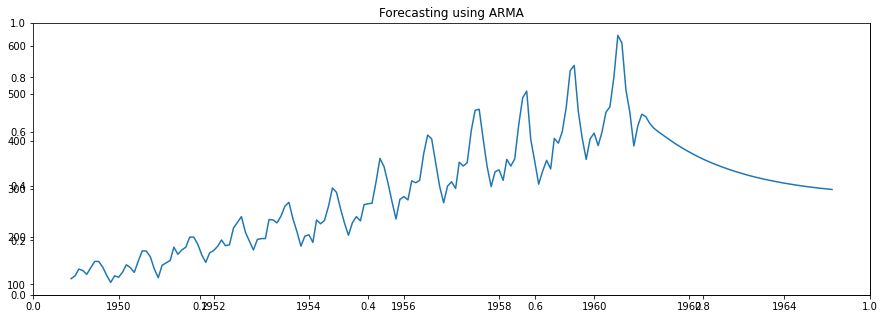

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax1= fig.add_subplot(111)
ax1.set_title('Forecasting using ARMA')
ax1.plot(pass_pred)

In [ ]:
new_pred_ARIMA=pd.Series(res7.forecast(49)[0],index=new_pred.index)
new_pred_ARIMA=pd.DataFrame(new_pred_ARIMA)
new_pred_ARIMA.columns=['Passengers']

In [ ]:
pass_pred_ARIMA=pd.concat([passenger,new_pred_ARIMA], axis=0)

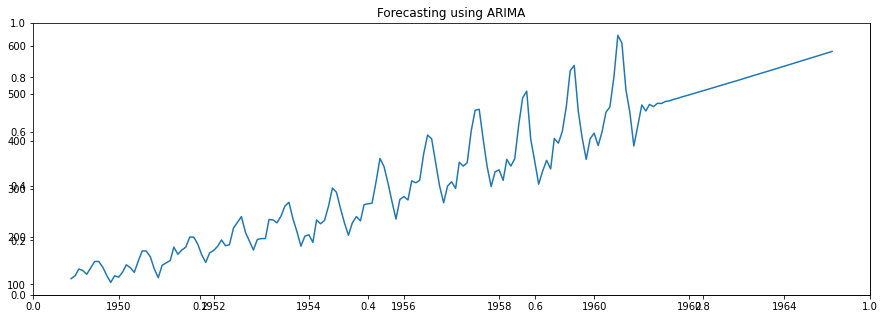

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax1= fig.add_subplot(111)
ax1.set_title('Forecasting using ARIMA')
ax1.plot(pass_pred_ARIMA)

**Split Train dan Test**

In [ ]:
train=passenger[:100]
test=passenger[100:]

In [ ]:
# check stasioneritas
print("data train stasionarity")
check_stationarity(train['Passengers'])

data train stasionarity
ADF Statistic: 1.509804
p-value: 0.997560
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
Non-stationary


In [ ]:
# differencing data non-stasioner
print("data train_diff1 stasionarity")
check_stationarity(train['Passengers'].diff().dropna())

data train_diff1 stasionarity
ADF Statistic: -2.180602
p-value: 0.213361
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585
Non-stationary


In [ ]:
# differencing data non-stasioner
print("data train_diff2 stasionarity")
check_stationarity(train['Passengers'].diff().diff().dropna())

data train_diff2 stasionarity
ADF Statistic: -12.177952
p-value: 0.000000
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585
Stationary


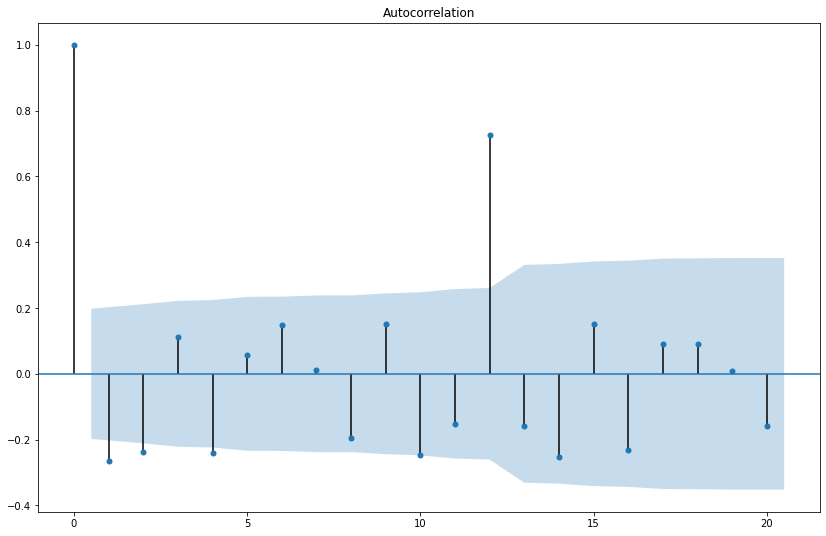

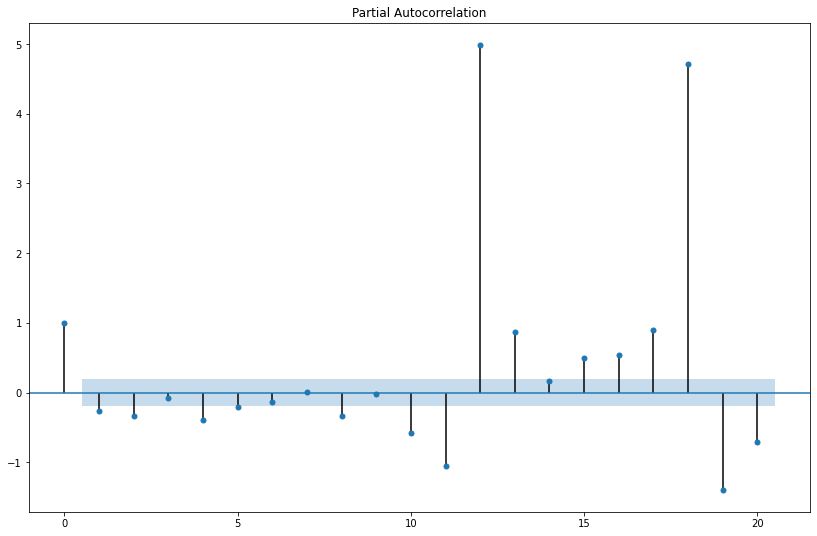

In [ ]:
# check plot pacf dan acf
plot_acf(train['Passengers'].diff().diff().dropna())
plot_pacf(train['Passengers'].diff().diff().dropna())
plt.show()

In [ ]:
arima=ARIMA(train,order=(2,2,2))
mod_train=arima.fit()
mod_train.aic

900.2343373113949

In [ ]:
y_pred_train=pd.Series(mod_train.forecast(100)[0],index=train.index)
y_pred_train=pd.DataFrame(y_pred_train)
y_pred_train.columns=['Passengers_predict']

In [ ]:
y_pred_train

,Passengers_predict
Date,
1949-01-01,337.687865
1949-02-01,347.648709
1949-03-01,345.534651
1949-04-01,351.410647
1949-05-01,352.074044
...,...
1956-12-01,632.391742
1957-01-01,635.806006
1957-02-01,639.227723


In [ ]:
passenger.shape

(144, 1)

In [ ]:
y_pred_test=pd.Series(mod_train.forecast(44)[0],index=test.index)
y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test.columns=['Passengers_predict']

In [ ]:
act_vs_pred=pd.concat([test,y_pred_test], axis=1)
act_vs_pred

,Passengers,Passengers_predict
Date,,
1957-05-01,355,337.687865
1957-06-01,422,347.648709
1957-07-01,465,345.534651
1957-08-01,467,351.410647
1957-09-01,404,352.074044
1957-10-01,347,356.161802
1957-11-01,305,358.020608
1957-12-01,336,361.350632
1958-01-01,340,363.730049


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

print('MAE train = ', mean_absolute_error(train, y_pred_train))
print('MAE test = ', mean_absolute_error(test, y_pred_test))

print('MSE train = ', mean_squared_error(train, y_pred_train))
print('MSE test = ', mean_squared_error(test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(test, y_pred_test)))

MAE train =  269.6461958839965
MAE test =  53.618548153503156
MSE train =  74047.01444569355
MSE test =  4806.648740877013
RMSE train =  272.11581072347406
RMSE test =  69.32999885242327


# **SARIMA**

In [ ]:
import statsmodels.api as sm

In [ ]:
sar=sm.tsa.statespace.SARIMAX(train['Passengers'], order=(1, 1, 1),seasonal_order=(1,1,1,7)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        Passengers   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -426.067
Date:                           Fri, 08 Jul 2022   AIC                            862.134
Time:                                   03:34:36   BIC                            874.743
Sample:                               01-01-1949   HQIC                           867.223
                                    - 04-01-1957                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6367      0.126     -5.034      0.000      -0.885      -0.389
ma.L1          0.9424      0.055     17.030      0.000       0.834       1.051
ar.S.L7       -0.0610      0.146     -0.419      0.675      -0.347       0.224
ma.S.L7       -0.9904      1.767     -0.560      0.575      -4.454       2.474
sigma2       504.9202    889.791      0.567      0.570   -1239.037    2248.878
===================================================================================
Ljung-Box (Q):                      166.81   Jarque-Bera (JB):                 2.09
Prob(Q):                              0.00   Prob(JB):                         0.35
Heteroskedasticity (H):               3.76   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sar_pred_test = sar.predict(start="1957-05-01", end="1960-12-01", dynamic=True)
sar_pred_test=pd.DataFrame(sar_pred_test)
sar_pred_test.columns=['Passengers_predict']
sar_pred_test

,Passengers_predict
1957-05-01,336.510886
1957-06-01,346.054373
1957-07-01,340.262147
1957-08-01,346.615872
1957-09-01,353.362701
1957-10-01,356.171039
1957-11-01,357.374956
1957-12-01,357.445120
1958-01-01,355.453474
1958-02-01,357.763960


In [ ]:
act_vs_pred_sar=pd.concat([test,sar_pred_test], axis=1)
act_vs_pred_sar

,Passengers,Passengers_predict
1957-05-01,355,336.510886
1957-06-01,422,346.054373
1957-07-01,465,340.262147
1957-08-01,467,346.615872
1957-09-01,404,353.362701
1957-10-01,347,356.171039
1957-11-01,305,357.374956
1957-12-01,336,357.445120
1958-01-01,340,355.453474
1958-02-01,318,357.763960


In [ ]:
print('MAE test = ', mean_absolute_error(test, sar_pred_test))
print('MSE test = ', mean_squared_error(test, sar_pred_test))
print('RMSE test = ', np.sqrt(mean_squared_error(test, sar_pred_test)))

MAE test =  54.479631073911996
MSE test =  5447.432514498695
RMSE test =  73.80672404665238
